In [1]:
# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from citipy import citipy
from urllib.error import HTTPError
from api_keys import api_key
api_key

'22646957123cb21bee91235dbc4a9f73'

,Latitude,Longitude,City Details
0,-84.288689,81.412257,"busselton,au"
1,-71.163349,130.455401,"new norfolk,au"
2,-25.045704,-102.379919,"puerto ayora,ec"
3,32.452535,101.586836,"linqiong,cn"
4,-23.173821,-52.432656,"alto parana,br"
5,-39.992070,43.559744,"tsihombe,mg"
6,-37.604130,15.600089,"cape town,za"
7,35.377680,34.826514,"dipkarpaz,cy"
8,11.509020,82.509611,"mamallapuram,in"
9,67.032038,155.018859,"srednekolymsk,ru"


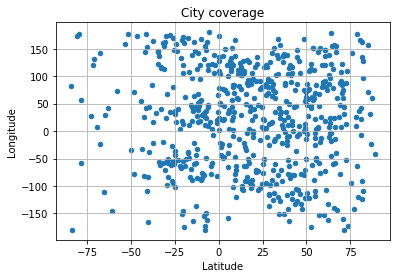

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Create latlng Dataframe to hold Lat, Long and City Details
latlngDf=pd.DataFrame()
latlngDf['Latitude']=lats
latlngDf['Longitude']=lngs
latlngDf['City Details']=""

# use iterrows to iterate through rows
for index, row in latlngDf.iterrows():
# citipy Looking up with coordinates : city = citipy.nearest_city(22.99, 120.21) , city.city_name , city.country_code  
    cityname = citipy.nearest_city(row['Latitude'], row['Longitude']).city_name
    countrycode = citipy.nearest_city(row['Latitude'], row['Longitude']).country_code
    # concat city name and country code as string and store in df
    latlngDf.loc[index,'City Details']=f"{cityname},{countrycode}"

# use drop_duplicates() method of Dataframe  to eliminate duplicate records for col(s) mentioned in subset.
latlngDf = latlngDf.drop_duplicates(subset=['City Details'],keep='first')
# reset index after duplicate records are dropped
latlngDf=latlngDf.reset_index(drop=True)
#latlngDf=latlngDf.head(15)
# Plot to show that cities are selected from across the world
latlngDf.plot(kind='scatter',x='Latitude',y='Longitude')
plt.grid()
plt.title("City coverage")
plt.savefig("City coverage.png")
latlngDf

In [3]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
# Create a new data frame weatherDf to hold the information that we require from the API calls
cols=("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")
weatherDf=pd.DataFrame(columns=cols)
weatherDf['City']=latlngDf['City Details']
# create empty list to hold list of nested dicts returned from API calls
data=[]
# set counters to track record processing
counter=1
sets=1
# from API documentation to access multiple items at once :  keys = ["main.temp", "main.humidity", "wind.speed"], data(*keys)
# create a 'datareq' key list
datareq = ['main.temp_max', 'main.humidity', 'clouds.all', 'wind.speed', 'name', 'sys.country','coord.lon','coord.lat','dt']
print("Beginning Data Retrieval")   
print("-----------------------------")
# # use iterrows to iterate through rows
for index, row in weatherDf.iterrows():
    try:
        place=row['City']
        # API documentation , get data by city name and country code , data = owm.get_current("Kassel,DE")
        data=owm.get_current(place, **settings)
        print(f"Processing Record {counter} of Set {sets} | {place}")
        # access multiple items at once using keys and store in a list
        info=data(*datareq)
        # Update weatherDf dataframe with values obtained
        weatherDf.loc[index, 'Cloudiness'] = info[2]
        weatherDf.loc[index, 'City'] = info[4]
        weatherDf.at[index,'Country'] = info[5]
        weatherDf.at[index,'Date'] = str(info[8])
        weatherDf.at[index,'Humidity'] = int(info[1])
        weatherDf.at[index,'Lat'] = info[7]
        weatherDf.at[index,'Lng'] = info[6]
        weatherDf.at[index,'Max Temp'] = info[0]
        weatherDf.at[index,'Wind Speed'] = info[3]
        # update counter to track record processing , increment set and reset counter after 50 records are processed
        counter=counter+1
        if counter > 50 :
            counter=1
            sets=sets+1
    except (HTTPError) :
        print(f"({place}) City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")
# Drop rows where value is Nan
weatherDf=weatherDf.dropna()
# set numeric cols to numeric using apply(pd.to_numeric)
weatherDf[["Cloudiness", "Humidity","Lat","Lng","Max Temp","Wind Speed"]] = weatherDf[["Cloudiness", "Humidity","Lat","Lng","Max Temp","Wind Speed"]].apply(pd.to_numeric)



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton,au
Processing Record 2 of Set 1 | new norfolk,au
Processing Record 3 of Set 1 | puerto ayora,ec
Processing Record 4 of Set 1 | linqiong,cn
Processing Record 5 of Set 1 | alto parana,br
(tsihombe,mg) City not found. Skipping...
Processing Record 6 of Set 1 | cape town,za
(dipkarpaz,cy) City not found. Skipping...
Processing Record 7 of Set 1 | mamallapuram,in
Processing Record 8 of Set 1 | srednekolymsk,ru
Processing Record 9 of Set 1 | rikitea,pf
Processing Record 10 of Set 1 | clyde river,ca
Processing Record 11 of Set 1 | sechura,pe
Processing Record 12 of Set 1 | butaritari,ki
Processing Record 13 of Set 1 | nikolskoye,ru
Processing Record 14 of Set 1 | yellowknife,ca
Processing Record 15 of Set 1 | avarua,ck
Processing Record 16 of Set 1 | hermanus,za
Processing Record 17 of Set 1 | bluff,nz
Processing Record 18 of Set 1 | arraial do cabo,br
Processing Record 19 of Set 1 | saskylakh,ru
P

Processing Record 7 of Set 4 | minbu,mm
Processing Record 8 of Set 4 | waitati,nz
Processing Record 9 of Set 4 | beauvais,fr
Processing Record 10 of Set 4 | araouane,ml
Processing Record 11 of Set 4 | leningradskiy,ru
Processing Record 12 of Set 4 | bambous virieux,mu
(sentyabrskiy,ru) City not found. Skipping...
Processing Record 13 of Set 4 | bethel,us
Processing Record 14 of Set 4 | niteroi,br
(saint anthony,ca) City not found. Skipping...
Processing Record 15 of Set 4 | nchelenge,zm
Processing Record 16 of Set 4 | fairbanks,us
Processing Record 17 of Set 4 | okhotsk,ru
Processing Record 18 of Set 4 | carnarvon,au
Processing Record 19 of Set 4 | kayasula,ru
(louisbourg,ca) City not found. Skipping...
(grand river south east,mu) City not found. Skipping...
(belushya guba,ru) City not found. Skipping...
Processing Record 20 of Set 4 | belyy yar,ru
Processing Record 21 of Set 4 | alice springs,au
(bac lieu,vn) City not found. Skipping...
Processing Record 22 of Set 4 | mindelo,cv
(marc

Processing Record 18 of Set 7 | bambanglipuro,id
Processing Record 19 of Set 7 | vanavara,ru
Processing Record 20 of Set 7 | havoysund,no
Processing Record 21 of Set 7 | cam ranh,vn
Processing Record 22 of Set 7 | chicama,pe
Processing Record 23 of Set 7 | vila do maio,cv
Processing Record 24 of Set 7 | jonesboro,us
Processing Record 25 of Set 7 | komsomolets,kz
Processing Record 26 of Set 7 | kitakata,jp
Processing Record 27 of Set 7 | monte redondo,pt
Processing Record 28 of Set 7 | havre-saint-pierre,ca
Processing Record 29 of Set 7 | korla,cn
(warqla,dz) City not found. Skipping...
(akkermanovka,ru) City not found. Skipping...
Processing Record 30 of Set 7 | ballina,au
Processing Record 31 of Set 7 | domoni,km
Processing Record 32 of Set 7 | burnie,au
Processing Record 33 of Set 7 | baillif,gp
Processing Record 34 of Set 7 | lorengau,pg
Processing Record 35 of Set 7 | victoria,sc
Processing Record 36 of Set 7 | san policarpo,ph
Processing Record 37 of Set 7 | gambela,et
Processing 

(toliary,mg) City not found. Skipping...
Processing Record 35 of Set 10 | gigmoto,ph
(raga,sd) City not found. Skipping...
(wala,pa) City not found. Skipping...
(doctor pedro p. pena,py) City not found. Skipping...
(sinkat,sd) City not found. Skipping...
Processing Record 36 of Set 10 | bonthe,sl
Processing Record 37 of Set 10 | rosario,ar
Processing Record 38 of Set 10 | the valley,ai
Processing Record 39 of Set 10 | bandarbeyla,so
Processing Record 40 of Set 10 | aklavik,ca
Processing Record 41 of Set 10 | barra patuca,hn
Processing Record 42 of Set 10 | verkhnevilyuysk,ru
Processing Record 43 of Set 10 | kinshasa,cd
(san jose,uy) City not found. Skipping...
Processing Record 44 of Set 10 | buraydah,sa
Processing Record 45 of Set 10 | suchil,mx
Processing Record 46 of Set 10 | bo rai,th
Processing Record 47 of Set 10 | port hedland,au
Processing Record 48 of Set 10 | teknaf,bd
Processing Record 49 of Set 10 | chunian,pk
Processing Record 50 of Set 10 | kulim,my
Processing Record 1 of

In [4]:
# Display the WeatherDf dataframe
weatherDf=weatherDf.reset_index(drop=True)
weatherDf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1567711199,61,-33.64,115.35,5.00,3.17
1,New Norfolk,1,AU,1567711199,93,-42.78,147.06,7.22,3.10
2,Puerto Ayora,0,EC,1567711149,61,-0.74,-90.35,26.00,5.70
3,Linqiong,40,CN,1567711199,94,30.42,103.46,25.56,0.44
4,Alto Parana,0,BR,1567711050,54,-23.13,-52.32,26.11,4.60
5,Cape Town,0,ZA,1567710901,67,-33.93,18.42,16.67,4.10
6,Mamallapuram,40,IN,1567711200,66,12.63,80.17,30.00,4.10
7,Srednekolymsk,99,RU,1567711200,70,67.46,153.71,4.70,3.95
8,Rikitea,75,PF,1567711200,82,-23.12,-134.97,20.30,6.62
9,Clyde River,75,CA,1567711200,75,70.47,-68.59,7.00,3.60


In [5]:
# Display the WeatherDf dataframe count and write to csv
weatherDf.to_csv('out.csv')
weatherDf.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

In [6]:
#Pick sample size of 600 without replacement based on the original dataframe 
#( only pick with replacement if the dataframe size is less than sample size)

if weatherDf['City'].count() > 600 :
    try:
        weatherDf= weatherDf.sample(600)
        weatherDf
        print ("Sample data set without replacement")
    except (ValueError):
        print ("Sample data set with replacement")
        weatherDf= weatherDf.sample(600,replace=True)
    # Reset index after sampling
        weatherDf=weatherDf.reset_index(drop=True)
#sampleW_Df
else:
    print ("Full data set")
weatherDf

Full data set


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1567711199,61,-33.64,115.35,5.00,3.17
1,New Norfolk,1,AU,1567711199,93,-42.78,147.06,7.22,3.10
2,Puerto Ayora,0,EC,1567711149,61,-0.74,-90.35,26.00,5.70
3,Linqiong,40,CN,1567711199,94,30.42,103.46,25.56,0.44
4,Alto Parana,0,BR,1567711050,54,-23.13,-52.32,26.11,4.60
5,Cape Town,0,ZA,1567710901,67,-33.93,18.42,16.67,4.10
6,Mamallapuram,40,IN,1567711200,66,12.63,80.17,30.00,4.10
7,Srednekolymsk,99,RU,1567711200,70,67.46,153.71,4.70,3.95
8,Rikitea,75,PF,1567711200,82,-23.12,-134.97,20.30,6.62
9,Clyde River,75,CA,1567711200,75,70.47,-68.59,7.00,3.60


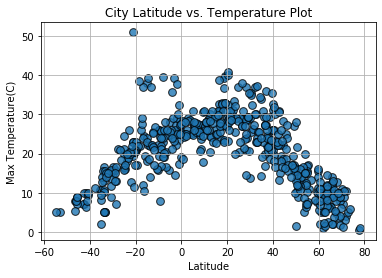

In [7]:
#Lat vs Max Temp

weatherDf.plot(kind='scatter',x='Lat',y='Max Temp',s=60,edgecolor='black',alpha=0.8)

plt.title("City Latitude vs. Temperature Plot")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()
#plt.xlim(-80,80)
plt.savefig('City Latitude vs.Temperature Plot.png')

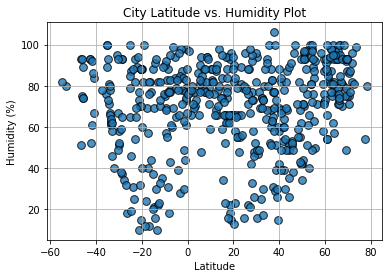

In [8]:
#Lat vs Humidity plot
weatherDf.plot(kind='scatter',x='Lat',y='Humidity',s=60,edgecolor='black',alpha=0.8)

plt.title("                                                                                                                                                                                                                                                                                                                                                                                                               ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xlim(-60,80)
plt.grid()
plt.savefig('City Latitude vs.Humidity Plot.png')

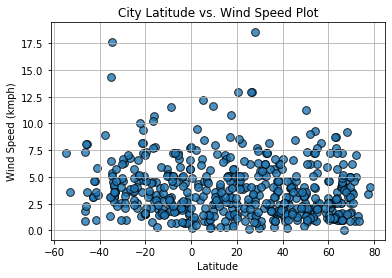

In [9]:
#Latitude vs. Wind Speed Plot
weatherDf.plot(kind='scatter',x='Lat',y='Wind Speed',s=60,edgecolor='black',alpha=0.8)
plt.title("City Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('City Latitude vs.Wind Speed Plot.png')

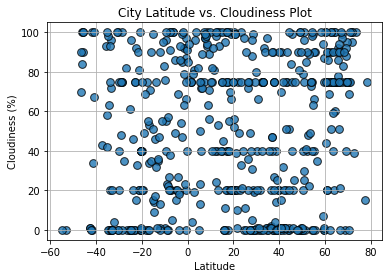

In [10]:
#Latitude vs. Cloudiness Plot
weatherDf.plot(kind='scatter',x='Lat',y='Cloudiness',s=60,edgecolor='black',alpha=0.8)
plt.title("City Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('City Latitude vs.Cloudiness Plot.png')